<a href="https://colab.research.google.com/github/AJITHKANNAN/Deep-Learning-Tutorials/blob/main/Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Data Augmentation To Address Overfitting In Flower Classification CNN
In this notebook we will build a CNN to classify flower images. We will also see how our model overfits and how overfitting can be addressed using data augmentation. Data augmentation is a process of generating new training samples from current training dataset using transformations such as zoom, rotations, change in contrast etc

Credits: I used tensorflow offical tutorial: https://www.tensorflow.org/tutorials/images/classification as a reference and made bunch of changes to make it simpler

In below image, 4 new training samples are generated from original sample using different transformations

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [2]:
import warnings as w

w.filterwarnings('ignore')

We will download flowers dataset from google website and store it locally. In below call it downloads the zip file (.tgz) in cache_dir which is . meaning the current folder

Load flowers dataset

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)


# cache_dir indicates where to download data. I specified '.' which means current directory
# untar true will unzip it

228813984/228813984 [==============================] - 1s 0us/step


In [4]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))[:5]


[PosixPath('datasets/flower_photos/dandelion/2502627784_4486978bcf.jpg'),
 PosixPath('datasets/flower_photos/dandelion/5605093210_5fecb71c61.jpg'),
 PosixPath('datasets/flower_photos/dandelion/2634666217_d5ef87c9f7_m.jpg'),
 PosixPath('datasets/flower_photos/dandelion/6994931380_a7588c1192_m.jpg'),
 PosixPath('datasets/flower_photos/dandelion/15268682367_5a4512b29f_m.jpg')]

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [7]:
roses = list(data_dir.glob('roses/*'))  # /content/datasets/flower_photos/roses
len(roses)

641

In [9]:
roses[:5]

[PosixPath('datasets/flower_photos/roses/174109630_3c544b8a2f.jpg'),
 PosixPath('datasets/flower_photos/roses/4503599544_3822e7d1be.jpg'),
 PosixPath('datasets/flower_photos/roses/7186509956_c37c02fb43_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4625089819_55c45a189c.jpg'),
 PosixPath('datasets/flower_photos/roses/16545641666_2781e542a0_m.jpg')]

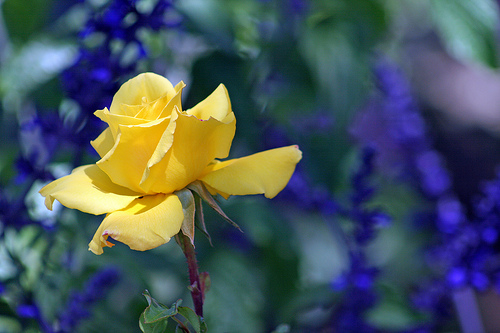

In [10]:
PIL.Image.open(roses[1])


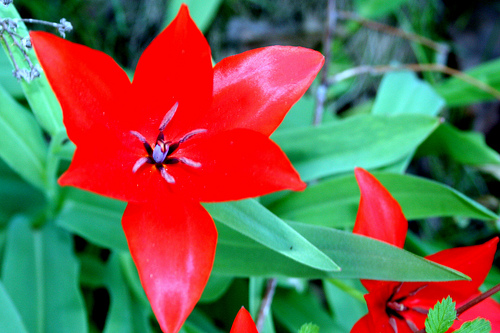

In [12]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

# Read flowers images from disk into numpy array using opencv


In [8]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [9]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}


In [15]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/174109630_3c544b8a2f.jpg'),
 PosixPath('datasets/flower_photos/roses/4503599544_3822e7d1be.jpg'),
 PosixPath('datasets/flower_photos/roses/7186509956_c37c02fb43_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4625089819_55c45a189c.jpg'),
 PosixPath('datasets/flower_photos/roses/16545641666_2781e542a0_m.jpg')]

In [16]:
str(flowers_images_dict['roses'][0])


'datasets/flower_photos/roses/174109630_3c544b8a2f.jpg'

#  imread()
# In OpenCV, the imread() function is used to load an image from a file. It takes the path to the image file as an argument and returns a NumPy array representing the image. The pixel values in the array are represented as BGR (blue, green, red) tuples.


In [10]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))



In [11]:
img.shape


(375, 500, 3)

# Resizing Images

In [12]:
cv2.resize(img,(180,180)).shape


(180, 180, 3)

# Preparing X and y for train and test

In [13]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():

    for image in images:

        img = cv2.imread(str(image))

        resized_img = cv2.resize(img,(180,180))

        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

array([[[ 76,  38,  49],
        [111,  53,  59],
        [ 93,  50,  53],
        ...,
        [ 28,  21,  18],
        [ 28,  21,  18],
        [ 29,  22,  19]],

       [[ 35,  35,  34],
        [ 52,  33,  28],
        [ 52,  39,  34],
        ...,
        [ 29,  22,  19],
        [ 29,  22,  19],
        [ 30,  23,  20]],

       [[ 47,  59,  53],
        [ 38,  38,  30],
        [ 33,  30,  25],
        ...,
        [ 29,  22,  19],
        [ 31,  24,  21],
        [ 28,  21,  18]],

       ...,

       [[225, 230, 229],
        [227, 232, 231],
        [228, 234, 233],
        ...,
        [126, 135, 123],
        [116, 128, 108],
        [131, 132, 116]],

       [[221, 227, 226],
        [225, 231, 230],
        [227, 233, 232],
        ...,
        [134, 139, 126],
        [136, 138, 124],
        [121, 132, 114]],

       [[220, 226, 225],
        [224, 230, 229],
        [225, 231, 230],
        ...,
        [123, 134, 120],
        [119, 128, 113],
        [113, 128, 110]]], dtype=uint8)
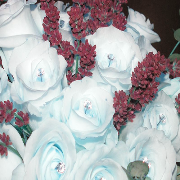

In [29]:
X[0]  # returns 3d array

# Converting X and y to numpy array

In [14]:
X = np.array(X)
y = np.array(y)

# Train test split

In [15]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size= 0.2, random_state=0)

# Preprocessing: scale images

pixel have range between 0 to 255 hence diveiding the X_train and X_test

In [16]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
X_train_scaled[0]

In [ ]:
X_test_scaled[0]

# Build convolutional neural network and train it


In [17]:
num_classes = 5  # coz we have 5 types of flowers

model = Sequential([

  #CNN
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  # Dense Layers
  layers.Flatten(),  # converting to 1-D array
  layers.Dense(128, activation='relu'),  # Hidden Layer

  layers.Dense(num_classes)

])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



In [ ]:
model.fit(X_train_scaled, y_train, epochs=5)

In [22]:
model.evaluate(X_test_scaled,y_test)


23/23 [==============================] - 7s 299ms/step - loss: 1.6062 - accuracy: 0.2425


[1.6062029600143433, 0.24250681698322296]

# Observed model is overfitted

as if performded well on training data but messed up in test data

In [23]:
predictions = model.predict(X_test_scaled)
predictions

23/23 [==============================] - 8s 325ms/step


array([[ 0.09499377,  0.12790173,  0.13828297,  0.15824896,  0.06662474],
       [ 0.19643167,  0.17048842,  0.17732614,  0.12512398,  0.0485553 ],
       [ 0.17722678,  0.1001922 ,  0.20856668,  0.15059514, -0.01925023],
       ...,
       [ 0.08438472,  0.11028239,  0.12688664,  0.04406573,  0.01370475],
       [ 0.12550512,  0.08493857,  0.22713614,  0.0922497 ,  0.04838825],
       [ 0.15556633,  0.10094245,  0.2082477 ,  0.17627509,  0.02596941]],
      dtype=float32)

In [43]:
score = tf.nn.softmax( predictions[0] )


# softmax converts numpy array into set of probabilities

In [44]:
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([0.57515633, 0.1290261 , 0.00358368, 0.07867608, 0.21355778],
      dtype=float32)>

In [45]:
np.argmax(score)  # Predicted


0

In [46]:
y_test[0] #Actual

1

flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}


# Improve Test Accuracy Using Data Augmentation


In [18]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(180, 180, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

# Original Image


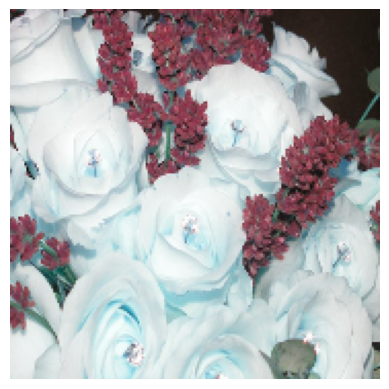

In [25]:

plt.axis('off')
plt.imshow(X[0])

# Newly generated training sample using data augmentation


In [ ]:

plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

# Train the model using data augmentation and a drop out layer


In [19]:
num_classes = 5

model = Sequential([

  data_augmentation, # layer-1

  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Dropout(0.2), # drop samples at rondom to make generalized model

  layers.Flatten(),
  layers.Dense(128, activation='relu'),

  layers.Dense(num_classes)
])

model.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



In [20]:
model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
92/92 [==============================] - 140s 2s/step - loss: 1.4982 - accuracy: 0.3467
Epoch 2/5
92/92 [==============================] - 103s 1s/step - loss: 1.2933 - accuracy: 0.4407
Epoch 3/5
92/92 [==============================] - 106s 1s/step - loss: 1.1766 - accuracy: 0.4993
Epoch 4/5
92/92 [==============================] - 102s 1s/step - loss: 1.1324 - accuracy: 0.5269
Epoch 5/5
92/92 [==============================] - 102s 1s/step - loss: 1.1068 - accuracy: 0.5473


In [21]:
model.evaluate(X_test_scaled,y_test)


23/23 [==============================] - 8s 339ms/step - loss: 1.1197 - accuracy: 0.5313


[1.1197237968444824, 0.531335175037384]

<!-- You can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased  -->

# You can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased